In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [69]:
import pandas as pd
monoterapi_obatA_obatB = pd.read_csv ('sel_obatA_obatB.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
monoterapi_obatA_obatB

,CELL_LINE,COMPOUND,Einf,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,ig
0,CAMA-1,AKT,3.688533,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,HCC1395,AKT,0.000000,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,Hs-578-T,AKT,17.701706,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,MDA-MB-157,AKT,5.095356,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,MDA-MB-468,AKT,26.827759,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,Calu-6,BCL2_2,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2250,NCI-H1563,BCL2_2,88.601043,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2251,NCI-H2085,BCL2_2,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2252,NCI-H23,BCL2_2,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [63]:
monoterapi_obatA_obatB.drop(labels = ['CELL_LINE','COMPOUND','ig'], axis = 1, inplace = True)

In [64]:
monoterapi_obatA_obatB

,Einf,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,3.688533,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.701706,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.095356,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.827759,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2250,88.601043,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2251,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2252,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
monoterapi_fiturAdanB=sel_fiturAdanB

In [67]:
monoterapi_fiturAdanB

,Einf,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,3.688533,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.701706,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.095356,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.827759,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2250,88.601043,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2251,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2252,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [11]:
fiturAdanB=pd.DataFrame(fiturAdanB)

In [13]:
fiturAdanB.dtypes

Einf            float64
nAcid           float64
ALogP           float64
ALogp2          float64
AMR             float64
                 ...   
PubchemFP876    float64
PubchemFP877    float64
PubchemFP878    float64
PubchemFP879    float64
PubchemFP880    float64
Length: 3350, dtype: object

In [14]:
fiturAdanB.info

<bound method DataFrame.info of             Einf  nAcid   ALogP    ALogp2      AMR        apol  naAromAtom  \
0       3.688533    0.0 -2.6724  7.141722  54.6141   64.013825        15.0   
1       0.000000    0.0 -2.6724  7.141722  54.6141   64.013825        15.0   
2      17.701706    0.0 -2.6724  7.141722  54.6141   64.013825        15.0   
3       5.095356    0.0 -2.6724  7.141722  54.6141   64.013825        15.0   
4      26.827759    0.0 -2.6724  7.141722  54.6141   64.013825        15.0   
...          ...    ...     ...       ...      ...         ...         ...   
2249  100.000000    0.0 -2.4574  6.038815  67.7698  109.207720        32.0   
2250   88.601043    0.0 -2.4574  6.038815  67.7698  109.207720        32.0   
2251  100.000000    0.0 -2.4574  6.038815  67.7698  109.207720        32.0   
2252  100.000000    0.0 -2.4574  6.038815  67.7698  109.207720        32.0   
2253  100.000000    0.0 -2.4574  6.038815  67.7698  109.207720        32.0   

      nAromBond  nAtom  nHeavyA

In [15]:
fiturAdanB.isnull().sum()

Einf             0
nAcid           33
ALogP           33
ALogp2          33
AMR             33
                ..
PubchemFP876    33
PubchemFP877    33
PubchemFP878    33
PubchemFP879    33
PubchemFP880    33
Length: 3350, dtype: int64

In [16]:
fiturdropna = fiturAdanB.dropna()

In [17]:
fiturdropna

,Einf,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,3.688533,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.701706,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.095356,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.827759,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2250,88.601043,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2251,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2252,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
fiturdropna.to_csv('fiturdropAdanB.csv', index=False)

In [ ]:
#SELEKSI FITUR LASSO

In [1]:
import pandas as pd
fiturdropna_AB = pd.read_csv ('fiturdropAdanB.csv')

In [2]:
fiturdropna_AB

,Einf,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,3.688533,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17.701706,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.095356,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.827759,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2183,88.601043,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2184,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2185,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [4]:
features_AB = fiturdropna_AB.drop(labels=['Einf'], axis=1)

In [5]:
features_AB

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,55.0,30.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2183,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2184,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2185,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,92.0,52.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
features_AB= list(features_AB)

In [7]:
features_AB

['nAcid',
 'ALogP',
 'ALogp2',
 'AMR',
 'apol',
 'naAromAtom',
 'nAromBond',
 'nAtom',
 'nHeavyAtom',
 'nH',
 'nB',
 'nC',
 'nN',
 'nO',
 'nS',
 'nP',
 'nF',
 'nCl',
 'nBr',
 'nI',
 'nX',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0e',
 'ATS1e',
 'ATS2e',
 'ATS3e',
 'ATS4e',
 'ATS5e',
 'ATS6e',
 'ATS7e',
 'ATS8e',
 'ATS0p',
 'ATS1p',
 'ATS2p',
 'ATS3p',
 'ATS4p',
 'ATS5p',
 'ATS6p',
 'ATS7p',
 'ATS8p',
 'ATS0i',
 'ATS1i',
 'ATS2i',
 'ATS3i',
 'ATS4i',
 'ATS5i',
 'ATS6i',
 'ATS7i',
 'ATS8i',
 'ATS0s',
 'ATS1s',
 'ATS2s',
 'ATS3s',
 'ATS4s',
 'ATS5s',
 'ATS6s',
 'ATS7s',
 'ATS8s',
 'AATS0m',
 'AATS1m',
 'AATS2m',
 'AATS3m',
 'AATS4m',
 'AATS5m',
 'AATS6m',
 'AATS7m',
 'AATS8m',
 'AATS0v',
 'AATS1v',
 'AATS2v',
 'AATS3v',
 'AATS4v',
 'AATS5v',
 'AATS6v',
 'AATS7v',
 'AATS8v',
 'AATS0e',
 'AATS1e',
 'AATS2e',
 'AATS3e',
 'AATS4e',
 'AATS5e',
 'AATS6e

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    fiturdropna_AB.drop(labels=['Einf'], axis=1), fiturdropna_AB['Einf'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1530, 3349), (657, 3349), (1530,), (657,))

In [9]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [10]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [11]:
#percobaan
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. model__alpha=0.1, score=-803.260, total=   1.4s
[CV] model__alpha=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] ................. model__alpha=0.1, score=-807.645, total=   1.7s
[CV] model__alpha=0.1 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


[CV] ................. model__alpha=0.1, score=-801.143, total=   1.7s
[CV] model__alpha=0.1 ................................................
[CV] ................. model__alpha=0.1, score=-867.771, total=   1.7s
[CV] model__alpha=0.1 ................................................
[CV] ................. model__alpha=0.1, score=-903.746, total=   1.7s
[CV] model__alpha=0.2 ................................................
[CV] ................. model__alpha=0.2, score=-800.641, total=   1.7s
[CV] model__alpha=0.2 ................................................
[CV] ................. model__alpha=0.2, score=-808.259, total=   1.3s
[CV] model__alpha=0.2 ................................................
[CV] ................. model__alpha=0.2, score=-797.573, total=   1.6s
[CV] model__alpha=0.2 ................................................
[CV] ................. model__alpha=0.2, score=-862.037, total=   0.9s
[CV] model__alpha=0.2 ................................................
[CV] .

[CV] .. model__alpha=1.3000000000000003, score=-814.214, total=   0.5s
[CV] model__alpha=1.3000000000000003 .................................
[CV] .. model__alpha=1.3000000000000003, score=-842.946, total=   0.7s
[CV] model__alpha=1.3000000000000003 .................................
[CV] .. model__alpha=1.3000000000000003, score=-826.788, total=   0.5s
[CV] model__alpha=1.3000000000000003 .................................
[CV] .. model__alpha=1.3000000000000003, score=-866.532, total=   0.4s
[CV] model__alpha=1.3000000000000003 .................................
[CV] .. model__alpha=1.3000000000000003, score=-898.442, total=   0.5s
[CV] model__alpha=1.4000000000000001 .................................
[CV] .. model__alpha=1.4000000000000001, score=-818.948, total=   0.5s
[CV] model__alpha=1.4000000000000001 .................................
[CV] .. model__alpha=1.4000000000000001, score=-846.858, total=   0.5s
[CV] model__alpha=1.4000000000000001 .................................
[CV] .

[CV] .. model__alpha=2.4000000000000004, score=-920.207, total=   0.6s
[CV] model__alpha=2.4000000000000004 .................................
[CV] .. model__alpha=2.4000000000000004, score=-932.885, total=   0.3s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .. model__alpha=2.5000000000000004, score=-872.268, total=   0.3s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .. model__alpha=2.5000000000000004, score=-893.588, total=   0.4s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .. model__alpha=2.5000000000000004, score=-901.227, total=   0.3s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .. model__alpha=2.5000000000000004, score=-926.072, total=   0.6s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .. model__alpha=2.5000000000000004, score=-934.823, total=   0.3s
[CV] model__alpha=2.6 ................................................
[CV] .

[CV] ................. model__alpha=3.6, score=-930.523, total=   0.3s
[CV] model__alpha=3.6 ................................................
[CV] ................. model__alpha=3.6, score=-964.761, total=   0.2s
[CV] model__alpha=3.6 ................................................
[CV] ................. model__alpha=3.6, score=-980.186, total=   0.3s
[CV] model__alpha=3.6 ................................................
[CV] ................. model__alpha=3.6, score=-964.277, total=   0.3s
[CV] model__alpha=3.7 ................................................
[CV] ................. model__alpha=3.7, score=-923.061, total=   0.2s
[CV] model__alpha=3.7 ................................................
[CV] ................. model__alpha=3.7, score=-933.512, total=   0.3s
[CV] model__alpha=3.7 ................................................
[CV] ................. model__alpha=3.7, score=-969.325, total=   0.2s
[CV] model__alpha=3.7 ................................................
[CV] .

[CV] ................. model__alpha=4.7, score=-993.687, total=   0.3s
[CV] model__alpha=4.8 ................................................
[CV] ................. model__alpha=4.8, score=-973.887, total=   0.3s
[CV] model__alpha=4.8 ................................................
[CV] ................. model__alpha=4.8, score=-964.471, total=   0.2s
[CV] model__alpha=4.8 ................................................
[CV] ................ model__alpha=4.8, score=-1015.096, total=   0.2s
[CV] model__alpha=4.8 ................................................
[CV] ................ model__alpha=4.8, score=-1033.710, total=   0.3s
[CV] model__alpha=4.8 ................................................
[CV] ................. model__alpha=4.8, score=-996.216, total=   0.3s
[CV] model__alpha=4.9 ................................................
[CV] ................. model__alpha=4.9, score=-978.370, total=   0.3s
[CV] model__alpha=4.9 ................................................
[CV] .

[CV] ................ model__alpha=5.9, score=-1052.049, total=   0.2s
[CV] model__alpha=5.9 ................................................
[CV] ................ model__alpha=5.9, score=-1084.501, total=   0.2s
[CV] model__alpha=5.9 ................................................
[CV] ................ model__alpha=5.9, score=-1029.841, total=   0.2s
[CV] model__alpha=6.0 ................................................
[CV] ................ model__alpha=6.0, score=-1030.042, total=   0.2s
[CV] model__alpha=6.0 ................................................
[CV] ................. model__alpha=6.0, score=-995.901, total=   0.2s
[CV] model__alpha=6.0 ................................................
[CV] ................ model__alpha=6.0, score=-1055.353, total=   0.2s
[CV] model__alpha=6.0 ................................................
[CV] ................ model__alpha=6.0, score=-1089.478, total=   0.2s
[CV] model__alpha=6.0 ................................................
[CV] .

[CV] ................ model__alpha=7.1, score=-1079.259, total=   0.3s
[CV] model__alpha=7.1 ................................................
[CV] ................ model__alpha=7.1, score=-1027.515, total=   0.2s
[CV] model__alpha=7.1 ................................................
[CV] ................ model__alpha=7.1, score=-1088.956, total=   0.2s
[CV] model__alpha=7.1 ................................................
[CV] ................ model__alpha=7.1, score=-1140.284, total=   0.2s
[CV] model__alpha=7.1 ................................................
[CV] ................ model__alpha=7.1, score=-1059.244, total=   0.2s
[CV] model__alpha=7.2 ................................................
[CV] ................ model__alpha=7.2, score=-1083.958, total=   0.2s
[CV] model__alpha=7.2 ................................................
[CV] ................ model__alpha=7.2, score=-1030.533, total=   0.2s
[CV] model__alpha=7.2 ................................................
[CV] .

[CV] ................ model__alpha=8.2, score=-1189.273, total=   0.2s
[CV] model__alpha=8.2 ................................................
[CV] ................ model__alpha=8.2, score=-1086.589, total=   0.3s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1129.261, total=   0.3s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1063.155, total=   0.3s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1127.834, total=   0.2s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1193.338, total=   0.2s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1089.372, total=   0.2s
[CV] model__alpha=8.4 ................................................
[CV] .

[CV] ................ model__alpha=9.4, score=-1098.431, total=   0.2s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-1165.747, total=   0.2s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-1233.246, total=   0.2s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-1123.243, total=   0.2s
[CV] model__alpha=9.5 ................................................
[CV] ................ model__alpha=9.5, score=-1171.532, total=   0.2s
[CV] model__alpha=9.5 ................................................
[CV] ................ model__alpha=9.5, score=-1101.593, total=   0.3s
[CV] model__alpha=9.5 ................................................
[CV] ................ model__alpha=9.5, score=-1169.310, total=   0.2s
[CV] model__alpha=9.5 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprec...
       2.7, 2.8, 2.9, 3. , 3.1,

In [13]:
search.best_params_

{'model__alpha': 0.5}

In [62]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.model_selection import GridSearchCV

In [66]:
test_scores = search.cv_results_['mean_test_score']
train_scores = search.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [41]:
from sklearn.svm import SVC
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV

from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

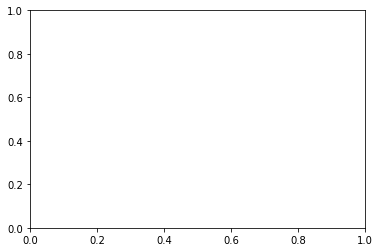

In [58]:
#digits = datasets.load_digits()
#X = digits.data
#y = digits.target

#clf_ = SVC(kernel='rbf')
#Cs = [1, 10, 100, 1000]
#Gammas = [1e-3, 1e-4]
#clf = GridSearchCV(clf_,
#            dict(C=Cs,
#                 gamma=Gammas),
#                 cv=2,
#                 pre_dispatch='1*n_jobs',
#                 n_jobs=1)

#clf.fit(X, y)

#scores = [x[1] for x in clf.grid_scores_]
#scores = np.array(scores).reshape(len(Cs), len(Gammas))

#for ind, i in enumerate(Cs):
#    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
#plt.legend()
#plt.xlabel('Gamma')
#plt.ylabel('Mean score')
#plt.show()

##########

#search = GridSearchCV(pipeline,
#                      {'model__alpha':np.arange(0.1,10,0.1)},
#                      cv = 5, scoring="neg_mean_squared_error",verbose=3
#                      )
plt.plot(pipeline, search)
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()

In [14]:
coefficients = search.best_estimator_.named_steps['model'].coef_
coefficients

array([-0.,  0., -0., ...,  0.,  0.,  0.])

In [15]:
importance = np.abs(coefficients)
importance

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
np.array(features_AB)[importance > 0]

array(['nP', 'AATSC7m', 'AATSC8m', 'AATSC4v', 'MATS7m', 'GATS3i',
       'GATS1s', 'VR1_DzZ', 'VR1_Dzm', 'VR1_Dzi', 'SpMin7_Bhi', 'nHdNH',
       'nHdCH2', 'ndCH2', 'naaaC', 'ndNH', 'ntN', 'ndsssP', 'SHdNH',
       'SHsNH2', 'FP77', 'FP133', 'FP147', 'FP163', 'FP284', 'FP325',
       'FP360', 'FP369', 'FP433', 'FP504', 'FP601', 'FP622', 'FP644',
       'FP652', 'FP659', 'FP709', 'FP792', 'FP842', 'FP882', 'FP948',
       'FP991', 'FP998', 'FP1011', 'PubchemFP30', 'PubchemFP131',
       'PubchemFP155', 'PubchemFP156', 'PubchemFP189', 'PubchemFP194',
       'PubchemFP195', 'PubchemFP260', 'PubchemFP292', 'PubchemFP314',
       'PubchemFP410', 'PubchemFP436', 'PubchemFP448', 'PubchemFP466',
       'PubchemFP494', 'PubchemFP559', 'PubchemFP650', 'PubchemFP653',
       'PubchemFP736', 'PubchemFP740', 'PubchemFP750', 'PubchemFP797',
       'PubchemFP799', 'PubchemFP813', 'PubchemFP820', 'PubchemFP829'],
      dtype='<U17')

In [19]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

In [28]:
#plt.scatter(X_test,y_test)
#plt.show()

In [12]:
# percobaan

In [29]:
# yang di pake saat ini 
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. model__alpha=0.1, score=-803.260, total=   3.6s
[CV] model__alpha=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ................. model__alpha=0.1, score=-807.645, total=   4.6s
[CV] model__alpha=0.1 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s


[CV] ................. model__alpha=0.1, score=-801.143, total=   4.1s
[CV] model__alpha=0.1 ................................................
[CV] ................. model__alpha=0.1, score=-867.771, total=   4.0s
[CV] model__alpha=0.1 ................................................
[CV] ................. model__alpha=0.1, score=-903.746, total=   4.0s
[CV] model__alpha=0.2 ................................................
[CV] ................. model__alpha=0.2, score=-800.641, total=   4.1s
[CV] model__alpha=0.2 ................................................
[CV] ................. model__alpha=0.2, score=-808.259, total=   2.9s
[CV] model__alpha=0.2 ................................................
[CV] ................. model__alpha=0.2, score=-797.573, total=   4.1s
[CV] model__alpha=0.2 ................................................
[CV] ................. model__alpha=0.2, score=-862.037, total=   2.0s
[CV] model__alpha=0.2 ................................................
[CV] .

[CV] .. model__alpha=1.3000000000000003, score=-814.214, total=   1.0s
[CV] model__alpha=1.3000000000000003 .................................
[CV] .. model__alpha=1.3000000000000003, score=-842.946, total=   2.0s
[CV] model__alpha=1.3000000000000003 .................................
[CV] .. model__alpha=1.3000000000000003, score=-826.788, total=   1.3s
[CV] model__alpha=1.3000000000000003 .................................
[CV] .. model__alpha=1.3000000000000003, score=-866.532, total=   1.1s
[CV] model__alpha=1.3000000000000003 .................................
[CV] .. model__alpha=1.3000000000000003, score=-898.442, total=   1.1s
[CV] model__alpha=1.4000000000000001 .................................
[CV] .. model__alpha=1.4000000000000001, score=-818.948, total=   1.0s
[CV] model__alpha=1.4000000000000001 .................................
[CV] .. model__alpha=1.4000000000000001, score=-846.858, total=   1.0s
[CV] model__alpha=1.4000000000000001 .................................
[CV] .

[CV] .. model__alpha=2.4000000000000004, score=-920.207, total=   0.6s
[CV] model__alpha=2.4000000000000004 .................................
[CV] .. model__alpha=2.4000000000000004, score=-932.885, total=   0.3s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .. model__alpha=2.5000000000000004, score=-872.268, total=   0.3s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .. model__alpha=2.5000000000000004, score=-893.588, total=   0.4s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .. model__alpha=2.5000000000000004, score=-901.227, total=   0.3s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .. model__alpha=2.5000000000000004, score=-926.072, total=   0.5s
[CV] model__alpha=2.5000000000000004 .................................
[CV] .. model__alpha=2.5000000000000004, score=-934.823, total=   0.3s
[CV] model__alpha=2.6 ................................................
[CV] .

[CV] ................. model__alpha=3.6, score=-930.523, total=   0.2s
[CV] model__alpha=3.6 ................................................
[CV] ................. model__alpha=3.6, score=-964.761, total=   0.2s
[CV] model__alpha=3.6 ................................................
[CV] ................. model__alpha=3.6, score=-980.186, total=   0.3s
[CV] model__alpha=3.6 ................................................
[CV] ................. model__alpha=3.6, score=-964.277, total=   0.3s
[CV] model__alpha=3.7 ................................................
[CV] ................. model__alpha=3.7, score=-923.061, total=   0.3s
[CV] model__alpha=3.7 ................................................
[CV] ................. model__alpha=3.7, score=-933.512, total=   0.2s
[CV] model__alpha=3.7 ................................................
[CV] ................. model__alpha=3.7, score=-969.325, total=   0.3s
[CV] model__alpha=3.7 ................................................
[CV] .

[CV] ................. model__alpha=4.7, score=-993.687, total=   0.3s
[CV] model__alpha=4.8 ................................................
[CV] ................. model__alpha=4.8, score=-973.887, total=   0.3s
[CV] model__alpha=4.8 ................................................
[CV] ................. model__alpha=4.8, score=-964.471, total=   0.2s
[CV] model__alpha=4.8 ................................................
[CV] ................ model__alpha=4.8, score=-1015.096, total=   0.3s
[CV] model__alpha=4.8 ................................................
[CV] ................ model__alpha=4.8, score=-1033.710, total=   0.3s
[CV] model__alpha=4.8 ................................................
[CV] ................. model__alpha=4.8, score=-996.216, total=   0.3s
[CV] model__alpha=4.9 ................................................
[CV] ................. model__alpha=4.9, score=-978.370, total=   0.3s
[CV] model__alpha=4.9 ................................................
[CV] .

[CV] ................ model__alpha=5.9, score=-1052.049, total=   0.2s
[CV] model__alpha=5.9 ................................................
[CV] ................ model__alpha=5.9, score=-1084.501, total=   0.2s
[CV] model__alpha=5.9 ................................................
[CV] ................ model__alpha=5.9, score=-1029.841, total=   0.2s
[CV] model__alpha=6.0 ................................................
[CV] ................ model__alpha=6.0, score=-1030.042, total=   0.2s
[CV] model__alpha=6.0 ................................................
[CV] ................. model__alpha=6.0, score=-995.901, total=   0.2s
[CV] model__alpha=6.0 ................................................
[CV] ................ model__alpha=6.0, score=-1055.353, total=   0.2s
[CV] model__alpha=6.0 ................................................
[CV] ................ model__alpha=6.0, score=-1089.478, total=   0.2s
[CV] model__alpha=6.0 ................................................
[CV] .

[CV] ................ model__alpha=7.1, score=-1079.259, total=   0.2s
[CV] model__alpha=7.1 ................................................
[CV] ................ model__alpha=7.1, score=-1027.515, total=   0.2s
[CV] model__alpha=7.1 ................................................
[CV] ................ model__alpha=7.1, score=-1088.956, total=   0.2s
[CV] model__alpha=7.1 ................................................
[CV] ................ model__alpha=7.1, score=-1140.284, total=   0.2s
[CV] model__alpha=7.1 ................................................
[CV] ................ model__alpha=7.1, score=-1059.244, total=   0.2s
[CV] model__alpha=7.2 ................................................
[CV] ................ model__alpha=7.2, score=-1083.958, total=   0.2s
[CV] model__alpha=7.2 ................................................
[CV] ................ model__alpha=7.2, score=-1030.533, total=   0.2s
[CV] model__alpha=7.2 ................................................
[CV] .

[CV] ................ model__alpha=8.2, score=-1189.273, total=   0.2s
[CV] model__alpha=8.2 ................................................
[CV] ................ model__alpha=8.2, score=-1086.589, total=   0.2s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1129.261, total=   0.2s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1063.155, total=   0.3s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1127.834, total=   0.2s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1193.338, total=   0.2s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1089.372, total=   0.2s
[CV] model__alpha=8.4 ................................................
[CV] .

[CV] ................ model__alpha=9.4, score=-1098.431, total=   0.2s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-1165.747, total=   0.2s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-1233.246, total=   0.2s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-1123.243, total=   0.2s
[CV] model__alpha=9.5 ................................................
[CV] ................ model__alpha=9.5, score=-1171.532, total=   0.3s
[CV] model__alpha=9.5 ................................................
[CV] ................ model__alpha=9.5, score=-1101.593, total=   0.2s
[CV] model__alpha=9.5 ................................................
[CV] ................ model__alpha=9.5, score=-1169.310, total=   0.3s
[CV] model__alpha=9.5 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprec...
       2.7, 2.8, 2.9, 3. , 3.1,

In [35]:
search.best_params_

{'model__alpha': 0.5}

In [36]:
coefficients = search.best_estimator_.named_steps['model'].coef_
coefficients

array([-0.,  0., -0., ...,  0.,  0.,  0.])

In [32]:
importance = np.abs(coefficients)
importance

array([0., 0., 0., ..., 0., 0., 0.])

In [37]:
np.array(features_AB)[importance > 0]

array(['nP', 'AATSC7m', 'AATSC8m', 'AATSC4v', 'MATS7m', 'GATS3i',
       'GATS1s', 'VR1_DzZ', 'VR1_Dzm', 'VR1_Dzi', 'SpMin7_Bhi', 'nHdNH',
       'nHdCH2', 'ndCH2', 'naaaC', 'ndNH', 'ntN', 'ndsssP', 'SHdNH',
       'SHsNH2', 'FP77', 'FP133', 'FP147', 'FP163', 'FP284', 'FP325',
       'FP360', 'FP369', 'FP433', 'FP504', 'FP601', 'FP622', 'FP644',
       'FP652', 'FP659', 'FP709', 'FP792', 'FP842', 'FP882', 'FP948',
       'FP991', 'FP998', 'FP1011', 'PubchemFP30', 'PubchemFP131',
       'PubchemFP155', 'PubchemFP156', 'PubchemFP189', 'PubchemFP194',
       'PubchemFP195', 'PubchemFP260', 'PubchemFP292', 'PubchemFP314',
       'PubchemFP410', 'PubchemFP436', 'PubchemFP448', 'PubchemFP466',
       'PubchemFP494', 'PubchemFP559', 'PubchemFP650', 'PubchemFP653',
       'PubchemFP736', 'PubchemFP740', 'PubchemFP750', 'PubchemFP797',
       'PubchemFP799', 'PubchemFP813', 'PubchemFP820', 'PubchemFP829'],
      dtype='<U17')

In [39]:
sel_obatAB_fiturAB = pd.read_csv('sel_obatA_obatB.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
sel_obatAB_fiturAB

,CELL_LINE,COMPOUND,Einf,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,ig
0,CAMA-1,AKT,3.688533,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,HCC1395,AKT,0.000000,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,Hs-578-T,AKT,17.701706,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,MDA-MB-157,AKT,5.095356,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,MDA-MB-468,AKT,26.827759,0.0,-2.6724,7.141722,54.6141,64.013825,15.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,Calu-6,BCL2_2,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2250,NCI-H1563,BCL2_2,88.601043,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2251,NCI-H2085,BCL2_2,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2252,NCI-H23,BCL2_2,100.000000,0.0,-2.4574,6.038815,67.7698,109.207720,32.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [43]:
fitur_fix_A_B = sel_obatAB_fiturAB[['CELL_LINE','COMPOUND','Einf','nP', 'AATSC7m', 'AATSC8m', 'AATSC4v', 'MATS7m', 'GATS3i',
       'GATS1s', 'VR1_DzZ', 'VR1_Dzm', 'VR1_Dzi', 'SpMin7_Bhi', 'nHdNH',
       'nHdCH2', 'ndCH2', 'naaaC', 'ndNH', 'ntN', 'ndsssP', 'SHdNH',
       'SHsNH2', 'FP77', 'FP133', 'FP147', 'FP163', 'FP284', 'FP325',
       'FP360', 'FP369', 'FP433', 'FP504', 'FP601', 'FP622', 'FP644',
       'FP652', 'FP659', 'FP709', 'FP792', 'FP842', 'FP882', 'FP948',
       'FP991', 'FP998', 'FP1011', 'PubchemFP30', 'PubchemFP131',
       'PubchemFP155', 'PubchemFP156', 'PubchemFP189', 'PubchemFP194',
       'PubchemFP195', 'PubchemFP260', 'PubchemFP292', 'PubchemFP314',
       'PubchemFP410', 'PubchemFP436', 'PubchemFP448', 'PubchemFP466',
       'PubchemFP494', 'PubchemFP559', 'PubchemFP650', 'PubchemFP653',
       'PubchemFP736', 'PubchemFP740', 'PubchemFP750', 'PubchemFP797',
       'PubchemFP799', 'PubchemFP813', 'PubchemFP820', 'PubchemFP829']]
fitur_fix_A_B

,CELL_LINE,COMPOUND,Einf,nP,AATSC7m,AATSC8m,AATSC4v,MATS7m,GATS3i,GATS1s,...,PubchemFP650,PubchemFP653,PubchemFP736,PubchemFP740,PubchemFP750,PubchemFP797,PubchemFP799,PubchemFP813,PubchemFP820,PubchemFP829
0,CAMA-1,AKT,3.688533,0.0,-1.867491,5.113199,-3.342541,-0.038675,1.243599,0.823568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,HCC1395,AKT,0.000000,0.0,-1.867491,5.113199,-3.342541,-0.038675,1.243599,0.823568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hs-578-T,AKT,17.701706,0.0,-1.867491,5.113199,-3.342541,-0.038675,1.243599,0.823568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MDA-MB-157,AKT,5.095356,0.0,-1.867491,5.113199,-3.342541,-0.038675,1.243599,0.823568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MDA-MB-468,AKT,26.827759,0.0,-1.867491,5.113199,-3.342541,-0.038675,1.243599,0.823568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,Calu-6,BCL2_2,100.000000,0.0,-0.106250,0.544723,-3.815792,-0.003053,1.151143,0.891800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2250,NCI-H1563,BCL2_2,88.601043,0.0,-0.106250,0.544723,-3.815792,-0.003053,1.151143,0.891800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2251,NCI-H2085,BCL2_2,100.000000,0.0,-0.106250,0.544723,-3.815792,-0.003053,1.151143,0.891800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2252,NCI-H23,BCL2_2,100.000000,0.0,-0.106250,0.544723,-3.815792,-0.003053,1.151143,0.891800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
fitur_fix_A_B.to_csv('monoterapi_fitur_Ab.csv', index=False)

In [72]:
import pandas as pd
monoterapi_fiturA_fiturB = pd.read_csv ('monoterapi_fitur_Ab.csv')

In [73]:
monoterapi_fiturA_fiturB

,CELL_LINE,COMPOUND,Einf,nP,AATSC7m,AATSC8m,AATSC4v,MATS7m,GATS3i,GATS1s,...,PubchemFP650,PubchemFP653,PubchemFP736,PubchemFP740,PubchemFP750,PubchemFP797,PubchemFP799,PubchemFP813,PubchemFP820,PubchemFP829
0,CAMA-1,AKT,3.688533,0.0,-1.867491,5.113199,-3.342541,-0.038675,1.243599,0.823568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,HCC1395,AKT,0.000000,0.0,-1.867491,5.113199,-3.342541,-0.038675,1.243599,0.823568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Hs-578-T,AKT,17.701706,0.0,-1.867491,5.113199,-3.342541,-0.038675,1.243599,0.823568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,MDA-MB-157,AKT,5.095356,0.0,-1.867491,5.113199,-3.342541,-0.038675,1.243599,0.823568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,MDA-MB-468,AKT,26.827759,0.0,-1.867491,5.113199,-3.342541,-0.038675,1.243599,0.823568,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,Calu-6,BCL2_2,100.000000,0.0,-0.106250,0.544723,-3.815792,-0.003053,1.151143,0.891800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2250,NCI-H1563,BCL2_2,88.601043,0.0,-0.106250,0.544723,-3.815792,-0.003053,1.151143,0.891800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2251,NCI-H2085,BCL2_2,100.000000,0.0,-0.106250,0.544723,-3.815792,-0.003053,1.151143,0.891800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2252,NCI-H23,BCL2_2,100.000000,0.0,-0.106250,0.544723,-3.815792,-0.003053,1.151143,0.891800,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1]:
#sel fitur kanker
import pandas as pd
cobain = pd.read_csv ('mutasi_sel_gen_fix.csv')
cobain

,CELL_LINE,AFF3,APC,ARID1A,ATM,BRCA2,CARD11,CREBBP,DCTN1,EP300,...,PTPRK,RANBP2,ROS1,SETBP1,SMARCA4,SPEN,TP53,TRRAP,UBR5,ZFHX3
0,HCC1806,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,NCI-H358,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,NCI-H3122,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,NCI-H747,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,T-24,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,T47D,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
81,NCI-H1437,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
82,NCI-H23,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,1,1,0,1
83,CAL-148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [2]:
list (cobain)

['CELL_LINE',
 'AFF3',
 'APC',
 'ARID1A',
 'ATM',
 'BRCA2',
 'CARD11',
 'CREBBP',
 'DCTN1',
 'EP300',
 'FAT1',
 'FAT4',
 'KDM6A',
 'KMT2D',
 'KRAS',
 'LRP1B',
 'MECOM',
 'NCOR1',
 'NUMA1',
 'PDE4DIP',
 'PIK3CA',
 'POLQ',
 'PREX2',
 'PTPN13',
 'PTPRK',
 'RANBP2',
 'ROS1',
 'SETBP1',
 'SMARCA4',
 'SPEN',
 'TP53',
 'TRRAP',
 'UBR5',
 'ZFHX3']